# MarlimR3D - Meshes and Models

In [1]:
import emg3d
import discretize
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from matplotlib.colors import LogNorm

In [2]:
%matplotlib notebook

## Load survey info

In [3]:
data = xr.load_dataset('marlim_survey.nc', engine='h5netcdf')

## Load results from modellers

### Tensor Mesh: emg3d

In [4]:
egd = emg3d.load('results/emg3d_model.h5')
mesh_emg3d = egd['mesh']
model_emg3d = egd['model']

Data loaded from «/home/dtr/Codes/article-os-csem/model-marlim/results/emg3d_model.h5»
[emg3d v0.12.0 (format 0.12.0) on 2020-10-09T18:53:08.692116].


### OcTree Mesh: SimPEG

In [5]:
# Load mesh
mesh_simpeg = discretize.TreeMesh.readUBC("results/simpeg_marlim_mesh.txt")
rhoh = np.load('results/simpeg_marlim_rhoh.npy')

### Tetrahedral Mesh: custEM

In [6]:
# TODO

## Figure

<IPython.core.display.Javascript object>


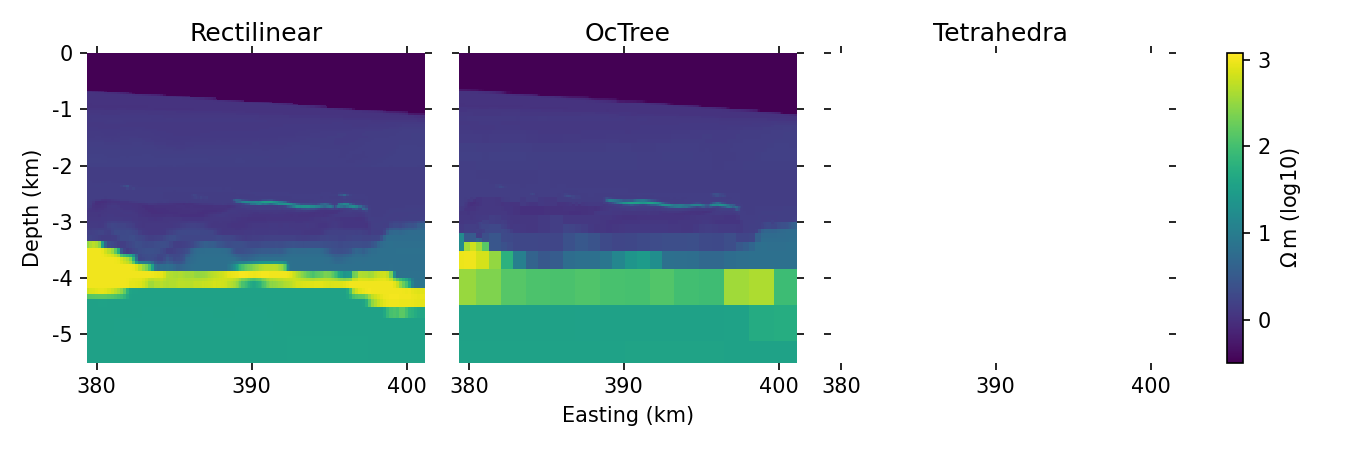

emg3d  :: y=7517799.0
SimPEG :: y=7517849.0


In [7]:
vmin, vmax = 0.32, 1200

# Initiate figure (axes shared)
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True, sharex=True)
(ax1, ax2, ax3) = axs


# # # (A) TensorMesh # # #
e_ind = 45
print(f"emg3d  :: y={mesh_emg3d.vectorCCy[e_ind]}")
dat = mesh_emg3d.plotSlice(
    np.log10(model_emg3d.property_x.ravel('F')),
    ind=e_ind, normal="Y", ax=ax1,
    clim=[np.log10(vmin), np.log10(vmax)],
    #pcolor_opts={"norm": LogNorm(vmin=vmin, vmax=vmax)}
)
ax1.set_title('Rectilinear')
ax1.set_ylabel('Depth (km)')
ax1.set_xlabel('')
ax1.set_rasterized(True)


# # # (B) OcTreeMesh (ax4-ax6) # # #

s_ind = 508 # Inline
print(f"SimPEG :: y={mesh_simpeg.vectorCCy[s_ind]}")
# Plot Ex-field
mesh_simpeg.plotSlice(
    rhoh, normal="Y", ind=s_ind, ax=ax2,
    pcolor_opts={"norm": LogNorm(vmin=vmin, vmax=vmax)}
)
ax2.set_title('OcTree')
ax2.set_xlabel('Easting (km)')
ax2.set_ylabel('')
ax2.set_rasterized(True)


# # # (C) TetrahedralMesh (ax7-ax9) # # #

# TODO
ax3.set_title('Tetrahedra')


# # # FINALIZE # # #

# Plot survey over meshes.
#for ax in axs:
#    ax.plot(data.attrs['rec_x'], data.attrs['rec_z'], 'C1*', ms=5)
#    ax.plot(data.src_x[::2], data.data_il.attrs['src_z'], 'C0.')

# Set x- and y-limits
ax1.set_xlim([data.src_x[0], data.src_x[-1]])
ax1.set_ylim([-5500, 0])

# Turn spines off, but ticks on all sides.
for ax in axs.ravel():
    [ax.spines[k].set_visible(False) for k in ax.spines.keys()]
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')

# Reduce number of ticks.
ax1.set_xticks(1000*np.array([380, 390, 400]))
ax1.set_xticklabels(['380', '390', '400'])
ax1.set_yticks(-1000*np.arange(6)[::-1])
ax1.set_yticklabels(['-5', '-4', '-3', '-2', '-1', '0'])

# Make tight, leave space for colorbar.
fig.tight_layout(rect=[0, 0, 0.95, 1])

# Colorbar.
c = fig.colorbar(dat[0], ax=axs, fraction=0.025)
c.ax.set_ylabel("$\Omega\,$m (log10)")

# Save and show.
fig.savefig(f'../manuscript/figures/results-marlim_allmodels.pdf', bbox_inches='tight')
fig.show()

In [8]:
emg3d.Report()

--------------------------------------------------------------------------------
  Date: Fri Oct 09 19:29:52 2020 CEST

                OS : Linux
            CPU(s) : 4
           Machine : x86_64
      Architecture : 64bit
               RAM : 15.5 GB
       Environment : Jupyter

  Python 3.8.3 (default, Jul  2 2020, 16:21:59)  [GCC 7.3.0]

             numpy : 1.18.5
             scipy : 1.5.0
             numba : 0.50.1
             emg3d : 0.13.1.dev6+gd263c3c.d20201009
           empymod : 2.0.3
            xarray : 0.16.1
        discretize : 0.5.1
              h5py : 2.10.0
        matplotlib : 3.2.2
              tqdm : 4.47.0
           IPython : 7.16.1

  Intel(R) Math Kernel Library Version 2020.0.1 Product Build 20200208 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------